<a href="https://colab.research.google.com/github/gmrammohan15/EVA4/blob/master/S12-Assignment/S12_PartA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import sys
sys.path.append('/content/gdrive/My Drive/S12-Assignment/')

In [0]:
%cd /content/gdrive/My Drive/S12-Assignment/

/content/gdrive/My Drive/S12-Assignment


In [0]:
!ls /content/

data-tinyimage	gdrive	sample_data


In [0]:
import tinyimageset_preprocessing as preprocess
preprocess.download_dataset()

Beginning dataset download with urllib2
Dataset downloaded


In [0]:
preprocess.unzip_data()

Extracting zip file: /content/gdrive/My Drive/S12-Assignment/tiny-imagenet-200.zip
Extracted at: /content/data-tinyimage


In [0]:
%cd /content/data-tinyimage
!ls

/content/data-tinyimage
tiny-imagenet-200


In [0]:
preprocess.format_val()

Formatting: /content/data-tinyimage/tiny-imagenet-200/val
Cleaning up: /content/data-tinyimage/tiny-imagenet-200/val/images
Formatting val done


In [0]:
preprocess.split_train_test()

In [0]:

!ls /content/data-tinyimage/tiny-imagenet-200/new_test

n01443537  n02113799  n02509815  n02988304  n03670208  n04146614  n04596742
n01629819  n02123045  n02666196  n02999410  n03706229  n04149813  n04597913
n01641577  n02123394  n02669723  n03014705  n03733131  n04179913  n06596364
n01644900  n02124075  n02699494  n03026506  n03763968  n04251144  n07579787
n01698640  n02125311  n02730930  n03042490  n03770439  n04254777  n07583066
n01742172  n02129165  n02769748  n03085013  n03796401  n04259630  n07614500
n01768244  n02132136  n02788148  n03089624  n03804744  n04265275  n07615774
n01770393  n02165456  n02791270  n03100240  n03814639  n04275548  n07695742
n01774384  n02190166  n02793495  n03126707  n03837869  n04285008  n07711569
n01774750  n02206856  n02795169  n03160309  n03838899  n04311004  n07715103
n01784675  n02226429  n02802426  n03179701  n03854065  n04328186  n07720875
n01855672  n02231487  n02808440  n03201208  n03891332  n04356056  n07734744
n01882714  n02233338  n02814533  n03250847  n03902125  n04366367  n07747607
n01910747  n

In [0]:
import torch
import torchvision
import torchvision.transforms as transforms
from Data_Transforms import cutout
from Data_Transforms import transform

data = transform.Data()

transform_train = transforms.Compose([
    transforms.Resize((32, 32)),
    #transforms.RandomCrop(64, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.4802, 0.4481, 0.3975], [0.2302, 0.2265, 0.2262]),
])
transform_train.transforms.append(cutout.Cutout(n_holes=4, length=4))
transform_test = transforms.Compose([ 
                    transforms.Resize((32, 32)),                
                    transforms.ToTensor(),
                    transforms.Normalize([0.4802, 0.4481, 0.3975], [0.2302, 0.2265, 0.2262])
                    ])
train_data = torchvision.datasets.ImageFolder(root='/content/data-tinyimage/tiny-imagenet-200/new_train', 
                                              transform=transform_train)

test_data = torchvision.datasets.ImageFolder(root='/content/data-tinyimage/tiny-imagenet-200/new_test', 
                                              transform=transform_test)

trainloader = data.getDataLoader(train_data, 256)
testloader = data.getDataLoader(test_data, 256)


In [0]:
!ls tiny-imagenet-200/train_set

ls: cannot access 'tiny-imagenet-200/train_set': No such file or directory


In [0]:
from Models import resnet

import torch

import importlib
importlib.reload(resnet)
from torchsummary import summary

model = resnet.ResNet18(num_classes=200)
use_cuda = torch.cuda.is_available()
model.device = torch.device("cuda" if use_cuda else "cpu")
print(model.device)
model = model.to(model.device)
model.summary((3,64,64))



cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 64, 64]           1,728
       BatchNorm2d-2           [-1, 64, 64, 64]             128
            Conv2d-3           [-1, 64, 64, 64]          36,864
       BatchNorm2d-4           [-1, 64, 64, 64]             128
            Conv2d-5           [-1, 64, 64, 64]          36,864
       BatchNorm2d-6           [-1, 64, 64, 64]             128
        BasicBlock-7           [-1, 64, 64, 64]               0
            Conv2d-8           [-1, 64, 64, 64]          36,864
       BatchNorm2d-9           [-1, 64, 64, 64]             128
           Conv2d-10           [-1, 64, 64, 64]          36,864
      BatchNorm2d-11           [-1, 64, 64, 64]             128
       BasicBlock-12           [-1, 64, 64, 64]               0
           Conv2d-13          [-1, 128, 32, 32]          73,728
      BatchNorm2d-14          [-1,

  pip install torch-lr-finder -v --global-option="amp"



Learning rate search finished. See the graph with {finder_name}.plot()


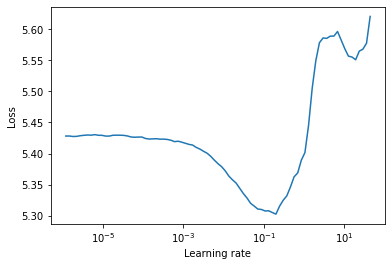

In [0]:
from lr_finder import LRFinder

import torch.optim as optim
import torch.nn as nn
from torch.optim.lr_scheduler import OneCycleLR
from torch.optim.lr_scheduler import StepLR


EPOCHS = 24
l2_loss = 0.0001
l1_lambda = 0
criterion = nn.CrossEntropyLoss()

#Optimizer
optimizer = optim.SGD(model.parameters(), lr=1e-7, momentum=0.9, weight_decay=l2_loss)

#LR Finder
lr_finder = LRFinder(model, optimizer, criterion, device=model.device)
lr_finder.range_test(trainloader, end_lr=100, num_iter=100)
lr_finder.plot() # to inspect the loss-learning rate graph
lr_finder.reset()

In [0]:
loss = lr_finder.history['loss']
lr = lr_finder.history['lr']
print(min(loss))
print(lr[loss.index(min(loss))])
print(int(len(train_data)))

5.30271266521582
0.19952623149688775
77000


In [0]:


import torch.optim as optim
import torch.nn as nn
from torch.optim.lr_scheduler import OneCycleLR
from torch.optim.lr_scheduler import StepLR
from eval import ModelTrainer
from torch.optim.lr_scheduler import ReduceLROnPlateau

EPOCHS = 50
l2_loss = 0.0001
l1_lambda = 0
criterion = nn.CrossEntropyLoss()

import one_cycle as OneCycle


onecycle = OneCycle.OneCycle(int(len(train_data) * EPOCHS / 256), max_lr=2e-1, momentum_vals=(0.95, 0.8))

optimizer = optim.SGD(model.parameters(), lr=1e-4, momentum=0.95, weight_decay=1e-4)

schedular = None
model.evaluate(optimizer, trainloader, testloader, EPOCHS, criterion, onecycle, schedular, False, l1_lambda)

Epoch= 0 Loss=4.208703994750977 Batch_id=300 Accuracy=10.50: 100%|██████████| 301/301 [06:07<00:00,  1.22s/it]
  0%|          | 0/301 [00:00<?, ?it/s]

Epoch 0, Train Accuracy: 10.5 , Test Accuracy: 9.754545454545454


Epoch= 1 Loss=3.7539074420928955 Batch_id=300 Accuracy=19.00: 100%|██████████| 301/301 [06:07<00:00,  1.22s/it]
  0%|          | 0/301 [00:00<?, ?it/s]

Epoch 1, Train Accuracy: 19.0 , Test Accuracy: 16.28181818181818


Epoch= 2 Loss=3.775888442993164 Batch_id=300 Accuracy=20.00: 100%|██████████| 301/301 [06:04<00:00,  1.21s/it]
  0%|          | 0/301 [00:00<?, ?it/s]

Epoch 2, Train Accuracy: 20.0 , Test Accuracy: 22.503030303030304


Epoch= 3 Loss=3.201502799987793 Batch_id=300 Accuracy=31.00: 100%|██████████| 301/301 [06:03<00:00,  1.21s/it]
  0%|          | 0/301 [00:00<?, ?it/s]

Epoch 3, Train Accuracy: 31.0 , Test Accuracy: 26.545454545454547


Epoch= 4 Loss=2.8884503841400146 Batch_id=300 Accuracy=38.50: 100%|██████████| 301/301 [06:03<00:00,  1.21s/it]
  0%|          | 0/301 [00:00<?, ?it/s]

Epoch 4, Train Accuracy: 38.5 , Test Accuracy: 28.306060606060605


Epoch= 5 Loss=2.6185944080352783 Batch_id=300 Accuracy=42.50: 100%|██████████| 301/301 [06:03<00:00,  1.21s/it]
  0%|          | 0/301 [00:00<?, ?it/s]

Epoch 5, Train Accuracy: 42.5 , Test Accuracy: 31.23030303030303


Epoch= 6 Loss=2.8251116275787354 Batch_id=300 Accuracy=43.00: 100%|██████████| 301/301 [06:03<00:00,  1.21s/it]
  0%|          | 0/301 [00:00<?, ?it/s]

Epoch 6, Train Accuracy: 43.0 , Test Accuracy: 33.666666666666664


Epoch= 7 Loss=2.397684097290039 Batch_id=300 Accuracy=51.00: 100%|██████████| 301/301 [06:05<00:00,  1.21s/it]
  0%|          | 0/301 [00:00<?, ?it/s]

Epoch 7, Train Accuracy: 51.0 , Test Accuracy: 34.99090909090909


Epoch= 8 Loss=2.0463786125183105 Batch_id=300 Accuracy=58.50: 100%|██████████| 301/301 [06:05<00:00,  1.22s/it]
  0%|          | 0/301 [00:00<?, ?it/s]

Epoch 8, Train Accuracy: 58.5 , Test Accuracy: 36.19090909090909


Epoch= 9 Loss=1.990657925605774 Batch_id=300 Accuracy=60.50: 100%|██████████| 301/301 [06:05<00:00,  1.22s/it]
  0%|          | 0/301 [00:00<?, ?it/s]

Epoch 9, Train Accuracy: 60.5 , Test Accuracy: 38.85151515151515


Epoch= 10 Loss=2.107937812805176 Batch_id=300 Accuracy=60.00: 100%|██████████| 301/301 [06:06<00:00,  1.22s/it]
  0%|          | 0/301 [00:00<?, ?it/s]

Epoch 10, Train Accuracy: 60.0 , Test Accuracy: 38.25454545454546


Epoch= 11 Loss=2.0164191722869873 Batch_id=300 Accuracy=63.00: 100%|██████████| 301/301 [06:05<00:00,  1.21s/it]
  0%|          | 0/301 [00:00<?, ?it/s]

Epoch 11, Train Accuracy: 63.0 , Test Accuracy: 38.903030303030306


Epoch= 12 Loss=1.6069655418395996 Batch_id=300 Accuracy=77.00: 100%|██████████| 301/301 [06:06<00:00,  1.22s/it]
  0%|          | 0/301 [00:00<?, ?it/s]

Epoch 12, Train Accuracy: 77.0 , Test Accuracy: 38.36666666666667


Epoch= 13 Loss=1.5910648107528687 Batch_id=300 Accuracy=80.50: 100%|██████████| 301/301 [06:06<00:00,  1.22s/it]
  0%|          | 0/301 [00:00<?, ?it/s]

Epoch 13, Train Accuracy: 80.5 , Test Accuracy: 40.04242424242424


Epoch= 14 Loss=1.3385064601898193 Batch_id=300 Accuracy=86.00: 100%|██████████| 301/301 [06:05<00:00,  1.22s/it]
  0%|          | 0/301 [00:00<?, ?it/s]

Epoch 14, Train Accuracy: 86.0 , Test Accuracy: 37.660606060606064


Epoch= 15 Loss=1.3107179403305054 Batch_id=300 Accuracy=90.50: 100%|██████████| 301/301 [06:06<00:00,  1.22s/it]
  0%|          | 0/301 [00:00<?, ?it/s]

Epoch 15, Train Accuracy: 90.5 , Test Accuracy: 37.275757575757574


Epoch= 16 Loss=1.0414141416549683 Batch_id=300 Accuracy=93.50: 100%|██████████| 301/301 [06:06<00:00,  1.22s/it]
  0%|          | 0/301 [00:00<?, ?it/s]

Epoch 16, Train Accuracy: 93.5 , Test Accuracy: 37.64545454545455


Epoch= 17 Loss=0.8753108382225037 Batch_id=300 Accuracy=97.00: 100%|██████████| 301/301 [06:06<00:00,  1.22s/it]
  0%|          | 0/301 [00:00<?, ?it/s]

Epoch 17, Train Accuracy: 97.0 , Test Accuracy: 37.836363636363636


Epoch= 18 Loss=1.0442242622375488 Batch_id=300 Accuracy=95.50: 100%|██████████| 301/301 [06:05<00:00,  1.22s/it]
  0%|          | 0/301 [00:00<?, ?it/s]

Epoch 18, Train Accuracy: 95.5 , Test Accuracy: 36.88787878787879


Epoch= 19 Loss=0.8786163330078125 Batch_id=300 Accuracy=98.50: 100%|██████████| 301/301 [06:04<00:00,  1.21s/it]
  0%|          | 0/301 [00:00<?, ?it/s]

Epoch 19, Train Accuracy: 98.5 , Test Accuracy: 37.236363636363635


Epoch= 20 Loss=0.786658525466919 Batch_id=300 Accuracy=99.00: 100%|██████████| 301/301 [06:05<00:00,  1.21s/it]
  0%|          | 0/301 [00:00<?, ?it/s]

Epoch 20, Train Accuracy: 99.0 , Test Accuracy: 37.75151515151515


Epoch= 21 Loss=0.6847179532051086 Batch_id=300 Accuracy=99.50: 100%|██████████| 301/301 [06:05<00:00,  1.21s/it]
  0%|          | 0/301 [00:00<?, ?it/s]

Epoch 21, Train Accuracy: 99.5 , Test Accuracy: 38.23939393939394


Epoch= 22 Loss=0.6814115643501282 Batch_id=300 Accuracy=100.00: 100%|██████████| 301/301 [06:06<00:00,  1.22s/it]
  0%|          | 0/301 [00:00<?, ?it/s]

Epoch 22, Train Accuracy: 100.0 , Test Accuracy: 36.557575757575755


Epoch= 23 Loss=0.6166083216667175 Batch_id=300 Accuracy=100.00: 100%|██████████| 301/301 [06:06<00:00,  1.22s/it]
  0%|          | 0/301 [00:00<?, ?it/s]

Epoch 23, Train Accuracy: 100.0 , Test Accuracy: 37.693939393939395


Epoch= 24 Loss=0.5137684345245361 Batch_id=300 Accuracy=100.00: 100%|██████████| 301/301 [06:06<00:00,  1.22s/it]
  0%|          | 0/301 [00:00<?, ?it/s]

Epoch 24, Train Accuracy: 100.0 , Test Accuracy: 37.90909090909091


Epoch= 25 Loss=0.4203120768070221 Batch_id=300 Accuracy=100.00: 100%|██████████| 301/301 [06:06<00:00,  1.22s/it]
  0%|          | 0/301 [00:00<?, ?it/s]

Epoch 25, Train Accuracy: 100.0 , Test Accuracy: 37.85151515151515


Epoch= 26 Loss=0.35141316056251526 Batch_id=300 Accuracy=100.00: 100%|██████████| 301/301 [06:06<00:00,  1.22s/it]
  0%|          | 0/301 [00:00<?, ?it/s]

Epoch 26, Train Accuracy: 100.0 , Test Accuracy: 38.43030303030303


Epoch= 27 Loss=0.26172077655792236 Batch_id=300 Accuracy=100.00: 100%|██████████| 301/301 [06:06<00:00,  1.22s/it]
  0%|          | 0/301 [00:00<?, ?it/s]

Epoch 27, Train Accuracy: 100.0 , Test Accuracy: 38.57272727272727


Epoch= 28 Loss=0.28231480717658997 Batch_id=300 Accuracy=100.00: 100%|██████████| 301/301 [06:06<00:00,  1.22s/it]
  0%|          | 0/301 [00:00<?, ?it/s]

Epoch 28, Train Accuracy: 100.0 , Test Accuracy: 37.60606060606061


Epoch= 29 Loss=0.2721003592014313 Batch_id=300 Accuracy=100.00: 100%|██████████| 301/301 [06:06<00:00,  1.22s/it]
  0%|          | 0/301 [00:00<?, ?it/s]

Epoch 29, Train Accuracy: 100.0 , Test Accuracy: 39.36060606060606


Epoch= 30 Loss=0.21409156918525696 Batch_id=300 Accuracy=100.00: 100%|██████████| 301/301 [06:06<00:00,  1.22s/it]
  0%|          | 0/301 [00:00<?, ?it/s]

Epoch 30, Train Accuracy: 100.0 , Test Accuracy: 39.36363636363637


Epoch= 31 Loss=0.16488885879516602 Batch_id=300 Accuracy=100.00: 100%|██████████| 301/301 [06:06<00:00,  1.22s/it]
  0%|          | 0/301 [00:00<?, ?it/s]

Epoch 31, Train Accuracy: 100.0 , Test Accuracy: 39.08181818181818


Epoch= 32 Loss=0.13904058933258057 Batch_id=300 Accuracy=100.00: 100%|██████████| 301/301 [06:06<00:00,  1.22s/it]
  0%|          | 0/301 [00:00<?, ?it/s]

Epoch 32, Train Accuracy: 100.0 , Test Accuracy: 40.28484848484848


Epoch= 33 Loss=0.13641884922981262 Batch_id=300 Accuracy=100.00: 100%|██████████| 301/301 [06:06<00:00,  1.22s/it]
  0%|          | 0/301 [00:00<?, ?it/s]

Epoch 33, Train Accuracy: 100.0 , Test Accuracy: 40.5


Epoch= 34 Loss=0.11166994273662567 Batch_id=300 Accuracy=100.00: 100%|██████████| 301/301 [06:06<00:00,  1.22s/it]
  0%|          | 0/301 [00:00<?, ?it/s]

Epoch 34, Train Accuracy: 100.0 , Test Accuracy: 40.875757575757575


Epoch= 35 Loss=0.03578546643257141 Batch_id=300 Accuracy=100.00: 100%|██████████| 301/301 [06:06<00:00,  1.22s/it]
  0%|          | 0/301 [00:00<?, ?it/s]

Epoch 35, Train Accuracy: 100.0 , Test Accuracy: 41.49393939393939


Epoch= 36 Loss=0.08502230048179626 Batch_id=300 Accuracy=100.00: 100%|██████████| 301/301 [06:06<00:00,  1.22s/it]
  0%|          | 0/301 [00:00<?, ?it/s]

Epoch 36, Train Accuracy: 100.0 , Test Accuracy: 41.842424242424244


Epoch= 37 Loss=0.023298678919672966 Batch_id=300 Accuracy=100.00: 100%|██████████| 301/301 [06:07<00:00,  1.22s/it]
  0%|          | 0/301 [00:00<?, ?it/s]

Epoch 37, Train Accuracy: 100.0 , Test Accuracy: 42.39393939393939


Epoch= 38 Loss=0.04266364499926567 Batch_id=300 Accuracy=100.00: 100%|██████████| 301/301 [06:04<00:00,  1.21s/it]
  0%|          | 0/301 [00:00<?, ?it/s]

Epoch 38, Train Accuracy: 100.0 , Test Accuracy: 43.096969696969694


Epoch= 39 Loss=0.01899811439216137 Batch_id=300 Accuracy=100.00: 100%|██████████| 301/301 [06:04<00:00,  1.21s/it]
  0%|          | 0/301 [00:00<?, ?it/s]

Epoch 39, Train Accuracy: 100.0 , Test Accuracy: 43.415151515151514


Epoch= 40 Loss=0.013919468969106674 Batch_id=300 Accuracy=100.00: 100%|██████████| 301/301 [06:04<00:00,  1.21s/it]
  0%|          | 0/301 [00:00<?, ?it/s]

Epoch 40, Train Accuracy: 100.0 , Test Accuracy: 43.6030303030303


Epoch= 41 Loss=0.050027113407850266 Batch_id=300 Accuracy=99.00: 100%|██████████| 301/301 [06:03<00:00,  1.21s/it]
  0%|          | 0/301 [00:00<?, ?it/s]

Epoch 41, Train Accuracy: 99.0 , Test Accuracy: 44.14242424242424


Epoch= 42 Loss=0.0042365496046841145 Batch_id=300 Accuracy=100.00: 100%|██████████| 301/301 [06:04<00:00,  1.21s/it]
  0%|          | 0/301 [00:00<?, ?it/s]

Epoch 42, Train Accuracy: 100.0 , Test Accuracy: 44.32727272727273


Epoch= 43 Loss=0.020160436630249023 Batch_id=300 Accuracy=99.50: 100%|██████████| 301/301 [06:04<00:00,  1.21s/it]
  0%|          | 0/301 [00:00<?, ?it/s]

Epoch 43, Train Accuracy: 99.5 , Test Accuracy: 44.22727272727273


Epoch= 44 Loss=0.004508156795054674 Batch_id=300 Accuracy=100.00: 100%|██████████| 301/301 [06:04<00:00,  1.21s/it]
  0%|          | 0/301 [00:00<?, ?it/s]

Epoch 44, Train Accuracy: 100.0 , Test Accuracy: 44.345454545454544


Epoch= 45 Loss=0.004391193389892578 Batch_id=300 Accuracy=100.00: 100%|██████████| 301/301 [06:04<00:00,  1.21s/it]
  0%|          | 0/301 [00:00<?, ?it/s]

Epoch 45, Train Accuracy: 100.0 , Test Accuracy: 44.29090909090909


Epoch= 46 Loss=0.005034600384533405 Batch_id=300 Accuracy=100.00: 100%|██████████| 301/301 [06:03<00:00,  1.21s/it]
  0%|          | 0/301 [00:00<?, ?it/s]

Epoch 46, Train Accuracy: 100.0 , Test Accuracy: 44.53030303030303


Epoch= 47 Loss=0.004899476654827595 Batch_id=300 Accuracy=100.00: 100%|██████████| 301/301 [06:04<00:00,  1.21s/it]
  0%|          | 0/301 [00:00<?, ?it/s]

Epoch 47, Train Accuracy: 100.0 , Test Accuracy: 44.54545454545455


Epoch= 48 Loss=0.005264171399176121 Batch_id=300 Accuracy=100.00: 100%|██████████| 301/301 [06:06<00:00,  1.22s/it]
  0%|          | 0/301 [00:00<?, ?it/s]

Epoch 48, Train Accuracy: 100.0 , Test Accuracy: 44.53030303030303


Epoch= 49 Loss=0.00418853759765625 Batch_id=300 Accuracy=100.00: 100%|██████████| 301/301 [06:06<00:00,  1.22s/it]
 80%|███████▉  | 103/129 [00:19<00:04,  5.34it/s]